### Import Automotive Data and Cleanse

Machine Learning for Engineers: [Automotive Monitoring](https://www.apmonitor.com/pds/index.php/Main/AutomotiveMonitoring)
- Description: Machine learning project with automotive data. Data includes travel distance, time, fuel rate, air flow, oxygen ratio, and other parameters available from an OBD2 interface.
- [Course Overview](https://apmonitor.com/pds)
- [Course Schedule](https://apmonitor.com/pds/index.php/Main/CourseSchedule)

<img width=400px align=left src='https://apmonitor.com/pds/uploads/Main/automotive_monitoring.png'>

### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import Data and View Columns

Import data, set time index, and print data columns

In [2]:
url = 'http://apmonitor.com/pds/uploads/Main/auto_trip.zip'
data = pd.read_csv(url)
data = data[::100]

# set time index
data['time'] = pd.to_datetime(data['time'])
data = data.set_index('time')

# print data columns
for x in data.columns:
    print(x)

Absolute load value (%)
Absolute pedal position D (%)
Altitude (GPS) (feet)
Ambient air temperature (℉)
Average fuel consumption (MPG)
Average fuel consumption (total) (MPG)
Average fuel consumption 10 sec (MPG)
Average speed (mph)
Average speed (GPS) (mph)
Barometric pressure (kPa)
Calculated boost (bar)
Calculated engine load value (%)
Calculated instant fuel consumption (MPG)
Calculated instant fuel rate (gal./h)
Catalyst temperature Bank 1 Sensor 1 (℉)
Distance to empty (miles)
Distance travelled (miles)
Distance travelled (total) (miles)
Engine coolant temperature (℉)
Engine RPM (rpm)
Fuel economizer (based on fuel system status and throttle position) ()
Fuel level input (%) (%)
Fuel level input (V) (gallon)
Fuel used (gallon)
Fuel used (total) (gallon)
Fuel used price ($)
Fuel used price (total) ($)
Fuel/Air commanded equivalence ratio ()
Instant engine power (based on fuel consumption) (hp)
Intake air temperature (℉)
MAF air flow rate (g/sec)
Oxygen sensor 1 Wide Range Current (

In [3]:
data.sample(5)

Absolute load value (%)  \
time                                               
2022-04-18 17:42:41.191                      NaN   
2022-04-18 19:03:01.641                      NaN   
2022-04-18 10:54:28.563                      NaN   
2022-04-18 17:37:57.376                      NaN   
2022-04-18 17:31:11.196                      NaN   

                         Absolute pedal position D (%)  Altitude (GPS) (feet)  \
time                                                                            
2022-04-18 17:42:41.191                            NaN                    NaN   
2022-04-18 19:03:01.641                            NaN                    NaN   
2022-04-18 10:54:28.563                            NaN                    NaN   
2022-04-18 17:37:57.376                           15.0                    NaN   
2022-04-18 17:31:11.196                            NaN                    NaN   

                         Ambient air temperature (℉)  \
time                                                   
2022-04-18 17:42:41.191                          NaN   
2022-04-18 19:03:01.641                          NaN   
2022-04-18 10:54:28.563                          NaN   
2022-04-18 17:37:57.376                          NaN   
2022-04-18 17:31:11.196                          NaN   

                         Average fuel consumption (MPG)  \
time                                                      
2022-04-18 17:42:41.191                             NaN   
2022-04-18 19:03:01.641                             NaN   
2022-04-18 10:54:28.563                             NaN   
2022-04-18 17:37:57.376                             NaN   
2022-04-18 17:31:11.196                             NaN   

                         Average fuel consumption (total) (MPG)  \
time                                                              
2022-04-18 17:42:41.191                                     NaN   
2022-04-18 19:03:01.641                                     NaN   
2022-04-18 10:54:28.563                                     NaN   
2022-04-18 17:37:57.376                                     NaN   
2022-04-18 17:31:11.196                                     NaN   

                         Average fuel consumption 10 sec (MPG)  \
time                                                             
2022-04-18 17:42:41.191                                    NaN   
2022-04-18 19:03:01.641                                    NaN   
2022-04-18 10:54:28.563                                    NaN   
2022-04-18 17:37:57.376                                    NaN   
2022-04-18 17:31:11.196                                    NaN   

                         Average speed (mph)  Average speed (GPS) (mph)  \
time                                                                      
2022-04-18 17:42:41.191                  NaN                        NaN   
2022-04-18 19:03:01.641                  NaN                        NaN   
2022-04-18 10:54:28.563                  NaN                        NaN   
2022-04-18 17:37:57.376                  NaN                        NaN   
2022-04-18 17:31:11.196                  NaN                        NaN   

                         Barometric pressure (kPa)  ...  \
time                                                ...   
2022-04-18 17:42:41.191                        NaN  ...   
2022-04-18 19:03:01.641                        NaN  ...   
2022-04-18 10:54:28.563                        NaN  ...   
2022-04-18 17:37:57.376                        NaN  ...   
2022-04-18 17:31:11.196                        NaN  ...   

                         Oxygen sensor 1 Wide Range Current (mA) (mA)  \
time                                                                    
2022-04-18 17:42:41.191                                           NaN   
2022-04-18 19:03:01.641                                           0.0   
2022-04-18 10:54:28.563                                           NaN   
2022-04-18 17:37:57.376                        

### Select Columns of Interest

In [4]:
# fill in NaNs - forward fill
data.fillna(method='ffill',inplace=True)
# fill in NaNs - backward fill
data.fillna(method='bfill',inplace=True)
dr = len(data)
data.describe()

Absolute load value (%)  Absolute pedal position D (%)  \
count              2919.000000                    2919.000000   
mean                 33.303105                      27.610140   
std                  11.839209                       6.942147   
min                   8.235294                      15.000000   
25%                  25.490196                      25.000000   
50%                  34.901961                      27.000000   
75%                  43.137255                      29.000000   
max                  62.352941                      46.000000   

       Altitude (GPS) (feet)  Ambient air temperature (℉)  \
count            2919.000000                          0.0   
mean             4945.240816                          NaN   
std               949.043957                          NaN   
min              2463.910840                          NaN   
25%              4560.367600                          NaN   
50%              5078.740320                          NaN   
75%              5692.257400                          NaN   
max              6446.850600                          NaN   

       Average fuel consumption (MPG)  Average fuel consumption (total) (MPG)  \
count                     2919.000000                             2919.000000   
mean                        36.958943                               37.725977   
std                          1.426529                                0.584324   
min                         32.872647                               36.667208   
25%                         36.466475                               37.160844   
50%                         37.323258                               37.766360   
75%                         38.073586                               38.283437   
max                         38.448748                               38.647150   

       Average fuel consumption 10 sec (MPG)  Average speed (mph)  \
count                            2919.000000          2919.000000   
mean                               36.954652            65.416881   
std                                 1.437938            10.151632   
min                                32.745248            17.517022   
25%                                36.460625            66.039858   
50%                                37.321134            68.299585   
75%                                38.076165            69.276341   
max                                38.440441            73.880289   

       Average speed (GPS) (mph)  Barometric pressure (kPa)  ...  \
count                2919.000000                2919.000000  ...   
mean                   37.615404                  83.754711  ...   
std                    28.282874                   3.062652  ...   
min                     5.689695                  80.000000  ...   
25%                    11.719539                  82.000000  ...   
50%                    14.881227                  83.000000  ...   
75%                    70.182394                  85.000000  ...   
max                    74.656090                  92.000000  ...   

       Oxygen sensor 1 Wide Range Current (mA) (mA)  \
count                                   2919.000000   
mean                                      -0.014798   
std                                        0.287445   
min                                       -0.394531   
25%                                       -0.089844   
50%                                       -0.035156   
75%                                       -0.011719   
max                                        2.242188   

       Oxygen sensor 1 Wide Range Equivalence ratio ()  Power from MAF (hp)  \
count                                      2919.000000          2919.000000   
mean                                         14.960448            25.901385   
std                                           2.096734            10.944229   
min                                          13.534341             2.388000   
25%            

### Plot Data

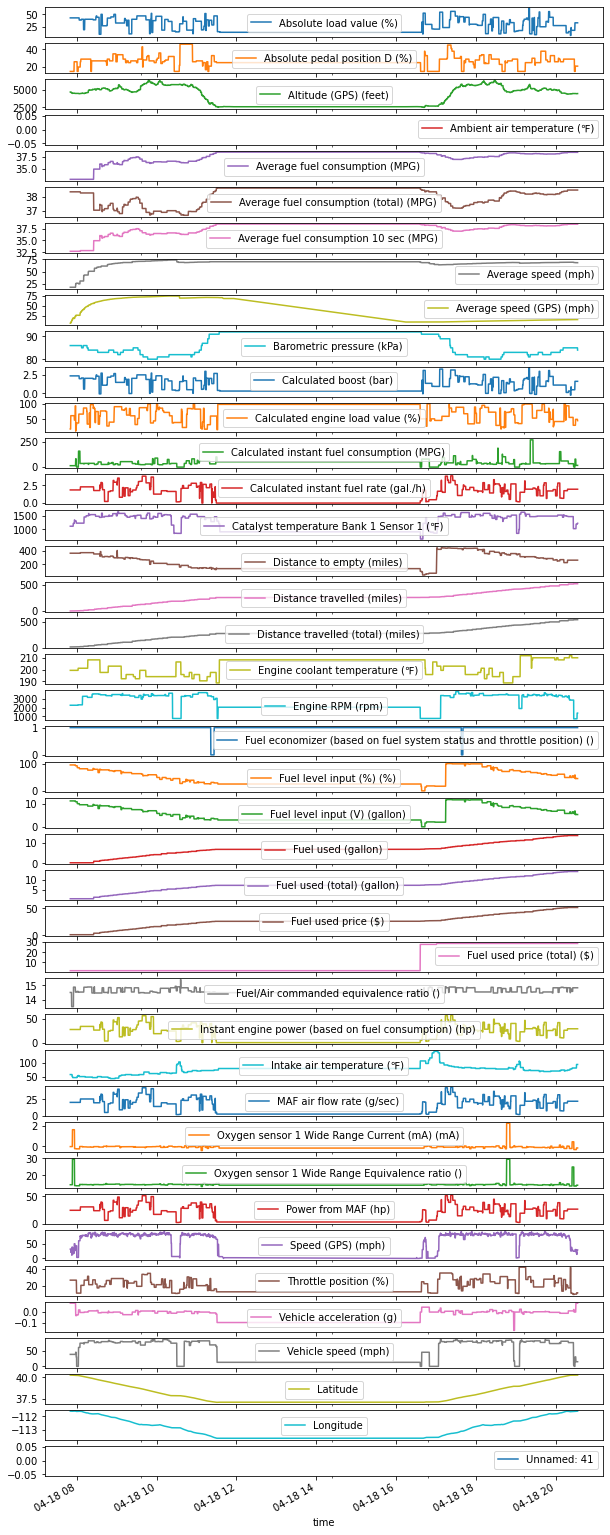

In [5]:
data.plot(subplots=True,figsize=(10,30))
plt.show()

### View GPS Points on Map

Create function to view GPS Data on Map from [Open Street Map](https://osm.org/go/TxdH5).

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import math
import requests
from PIL import Image
from io import BytesIO

def deg2num(lat_deg, lon_deg, zoom):
  lat_rad = math.radians(lat_deg)
  n = 2.0 ** zoom
  xtile = int((lon_deg + 180.0) / 360.0 * n)
  ytile = int((1.0 - math.log(math.tan(lat_rad) + (1 / math.cos(lat_rad))) / math.pi) / 2.0 * n)
  return (xtile, ytile)
  
def num2deg(xtile, ytile, zoom):
  n = 2.0 ** zoom
  lon_deg = xtile / n * 360.0 - 180.0
  lat_rad = math.atan(math.sinh(math.pi * (1 - 2 * ytile / n)))
  lat_deg = math.degrees(lat_rad)
  return (lat_deg, lon_deg)
  
def getImageCluster(lat_deg, lon_deg, delta_lat,  delta_long):
    smurl = r"http://a.tile.openstreetmap.org/{0}/{1}/{2}.png"

    # find the correct zoom level
    zoom = 1; nt = 1
    while nt<3 and zoom<=13:
        zoom+=1 # increment zoom level
        xmin, ymax =deg2num(lat_deg, lon_deg, zoom)
        xmax, ymin =deg2num(lat_deg + delta_lat, lon_deg + delta_long, zoom)
        nt = (xmax-xmin)*(ymax-ymin)
    print('Number of tiles: ',nt)
    
    # calculate bounding box for all tiles
    lat1,long1 = num2deg(xmin,ymin,zoom)
    lat2,long2 = num2deg(xmax,ymax,zoom)
    nlong = xmax-xmin
    nlat  = ymax-ymin
    w = (nlong)*256
    h = (nlat)*256
    print('Tiles: ',nlat,nlong)
    bb = [w,h,lat1,lat2,long1,long2]
    
    Cluster = Image.new('RGB',((xmax-xmin+1)*256-1,(ymax-ymin+1)*256-1) ) 
    for xtile in range(xmin, xmax+1):
        for ytile in range(ymin, ymax+1):
            try:
                imgurl=smurl.format(zoom, xtile, ytile)
                imgstr = requests.get(imgurl).content
                tile = Image.open(BytesIO(imgstr))
                Cluster.paste(tile, box=((xtile-xmin)*256 ,  (ytile-ymin)*255))
            except: 
                print("Couldn't download image")
                tile = None
    return [bb,Cluster]    

C:\Users\johnh\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


### Display GPS Route on Static Map

See the [Open Street Map (OSM) Usage Policy](https://operations.osmfoundation.org/policies/tiles/) for policies that prevent overloading the public server.

Number of tiles:  3
Tiles:  3 1


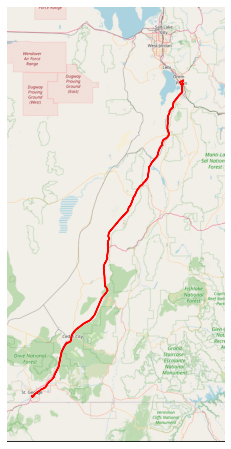

In [7]:
x = data['Longitude'].values
y = data['Latitude'].values
lat1 = y.max(); lat2 = y.min()
long1 = x.min(); long2 = x.max()
dx = long2-long1
dy = lat1-lat2

bb,a = getImageCluster(lat2, long1, dy,  dx)
fig = plt.figure(figsize=(10,8))
fig.patch.set_facecolor('white')
plt.imshow(np.asarray(a))

# plot scaled data on map
w,h,bblat1,bblat2,bblong1,bblong2 = bb
xs = (x-bblong1) * w/(bblong2-bblong1)
ys = (y-bblat1) * h/(bblat2-bblat1)
plt.plot(xs,ys,'r-')

plt.axis('off')
plt.savefig('map_GPS.png')
plt.show()

### Display GPS with Plotly Express (Less Complicated, Fewer Options)

In [11]:
import plotly.express as px

df = px.data.carshare()
fig = px.scatter_mapbox(data, lat="Latitude", lon="Longitude", \
                        color="Vehicle speed (mph)", size="Altitude (GPS) (feet)", \
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=5, zoom=6)
fig.update_layout(
    mapbox_style="open-street-map",
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
)
fig.show()

### GPS Route with Plotly (More Complicated, More Options)

In [8]:
import plotly.graph_objects as go
import numpy as np

# minimum and maximum latitudes for plot
min_lat = data['Latitude'].min()
max_lat = data['Latitude'].max()
d_lat = abs(max_lat - min_lat)

# minimum and maximum longitudes for plot
min_lon = data['Longitude'].min()
max_lon = data['Longitude'].max()
d_lon = abs(max_lon - min_lon)

# Scattergeo or Scattermapbox
fig = go.Figure(data=go.Scattermapbox(
    lat = data['Latitude'],
    lon = data['Longitude'],
    text = data['Altitude (GPS) (feet)'].astype(int).astype(str) + ' ft ' + 
            data['Speed (GPS) (mph)'].astype(int).astype(str) + ' mph',
    marker = dict(
        color = data['Speed (GPS) (mph)'],
        size = data['Altitude (GPS) (feet)'].values/1000.0,
        colorscale = 'sunset',
        reversescale = False,
        opacity = 0.7,
        colorbar = dict(
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            showticksuffix = "last",
            dtick = 10
        )
    )
))

fig.update_layout(
    title='Vehicle Data',
    mapbox = dict(style="stamen-terrain",
                  bearing=0,
                  center=go.layout.mapbox.Center(
                    lat=np.mean([min_lat,max_lat]),
                    lon=np.mean([min_lon,max_lon])),
                  pitch=0,zoom=5),
)
fig.show()